### Problem statement : Predict if user is going to buy iPhone or not

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

### Data Gathering

In [14]:
raw_data = pd.read_csv('iphone_purchase_records.csv')
raw_data.head()

,Gender,Age,Salary,Purchase Iphone
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [6]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Gender           400 non-null    object
 1   Age              400 non-null    int64 
 2   Salary           400 non-null    int64 
 3   Purchase Iphone  400 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 12.6+ KB


In [15]:
raw_data['Gender'] = raw_data['Gender'].apply(lambda gen : 1 if gen == 'Female' else 0)

In [16]:
raw_data.head()

,Gender,Age,Salary,Purchase Iphone
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0


In [17]:
raw_data.describe()

,Gender,Age,Salary,Purchase Iphone
count,400.000000,400.000000,400.000000,400.000000
mean,0.510000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,1.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


### EDA

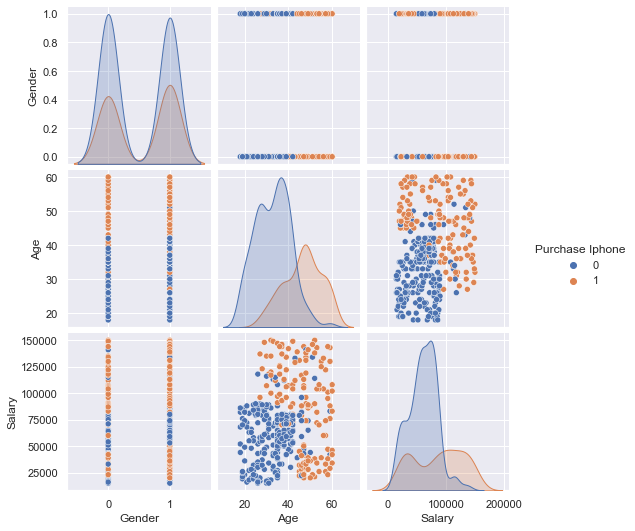

In [20]:
sns.pairplot(raw_data,hue='Purchase Iphone')

### Scale data 

In [22]:
from sklearn.preprocessing import StandardScaler 

In [23]:
scaler = StandardScaler()

In [27]:
scaled_data = scaler.fit_transform(raw_data.drop('Purchase Iphone',axis=1))

In [34]:
scaled_data

array([[-1.02020406, -1.78179743, -1.49004624],
       [-1.02020406, -0.25358736, -1.46068138],
       [ 0.98019606, -1.11320552, -0.78528968],
       ...,
       [ 0.98019606,  1.17910958, -1.46068138],
       [-1.02020406, -0.15807423, -1.07893824],
       [ 0.98019606,  1.08359645, -0.99084367]])

In [45]:
X = scaled_data
y = raw_data['Purchase Iphone']

### Train Test Split

In [42]:
from sklearn.model_selection import train_test_split

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y,test_size=0.25,random_state=1,stratify=y)

### Model Train

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn = KNeighborsClassifier(n_neighbors=1)

In [57]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=1)

In [58]:
Y_pred = knn.predict(X_test)

In [59]:
Y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1], dtype=int64)

### Prediction and Evaluation

In [60]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [61]:
confusion_matrix(Y_test,Y_pred)

array([[59,  5],
       [ 5, 31]], dtype=int64)

In [62]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92        64
           1       0.86      0.86      0.86        36

    accuracy                           0.90       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.90      0.90      0.90       100



In [78]:
accuracy_score = []

for i in range(1,41):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,X_train,Y_train)
    accuracy_score.append(score.mean())

In [79]:
error_score = []

for i in range(1,41):
    knn = KNeighborsClassifier(n_neighbors=i)
    score = cross_val_score(knn,X_train,Y_train)
    error_score.append(1- score.mean())

Text(0.5, 1.0, 'Error Rate Graph')

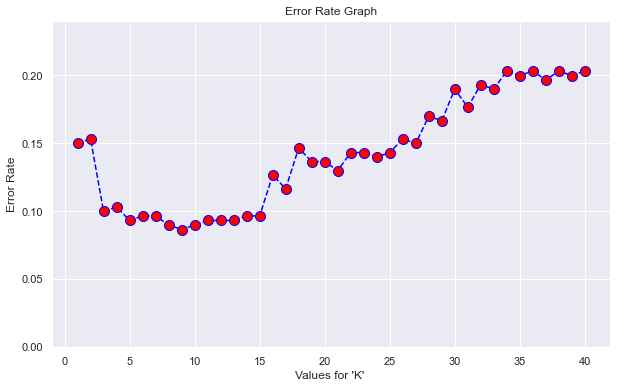

In [93]:
plt.figure(figsize=(10,6))
plt.plot(range(1,41),error_score, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.xlabel("Values for 'K' ")
plt.ylabel("Error Rate")
plt.ylim(0,0.24)
plt.title("Error Rate Graph")

Text(0.5, 1.0, 'Accuracy Rate Graph')

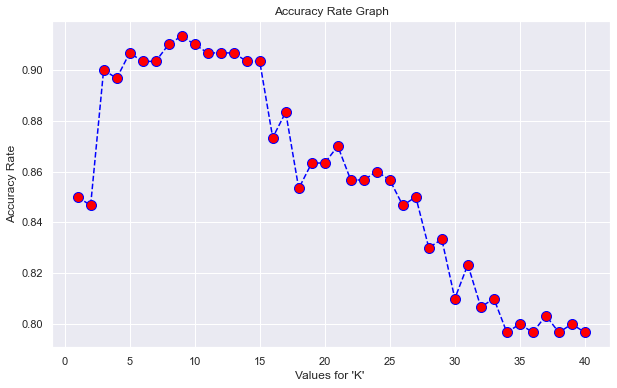

In [94]:
plt.figure(figsize=(10,6))
plt.plot(range(1,41),accuracy_score, color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.xlabel("Values for 'K' ")
plt.ylabel("Accuracy Rate")
plt.title("Accuracy Rate Graph")

In [95]:
# 17 - 22

In [96]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [100]:

knn = KNeighborsClassifier()
param_grid = { 'n_neighbors': range(1,41)  , 'p':[2] }

gscv = GridSearchCV(knn,param_grid)
gscv.fit(X_train,Y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 41), 'p': [2]})

In [101]:
gscv.best_estimator_

KNeighborsClassifier(n_neighbors=9)

In [103]:

knn = KNeighborsClassifier()
param_grid = { 'n_neighbors': range(1,41)  , 'p':[2] }

radom_scv = RandomizedSearchCV(knn,param_grid)
radom_scv.fit(X_train,Y_train)

RandomizedSearchCV(estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': range(1, 41), 'p': [2]})

In [104]:
radom_scv.best_estimator_

KNeighborsClassifier(n_neighbors=9)

In [105]:
knn = KNeighborsClassifier(n_neighbors=9)

In [106]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=9)

In [108]:
Y_pred = knn.predict(X_test)

In [109]:
confusion_matrix(Y_test,Y_pred)

array([[58,  6],
       [ 4, 32]], dtype=int64)

In [111]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92        64
           1       0.84      0.89      0.86        36

    accuracy                           0.90       100
   macro avg       0.89      0.90      0.89       100
weighted avg       0.90      0.90      0.90       100

